# Lecture 19

1. Regression models, OLS, RIDGE, LASSO
    1. Applications
    2. Models
    
2. Evaluate regression models
    1. Mean squared errors (MSE)
    2. R^2
    
3. Linear regression (LR)
    1. Ordinary LR
    2. LR with regularization
    
4. Robust regression

    4.1. Goal: fitting a regression model in the presence of corrupt data: either outliers, or error in the model
    
    4.2. Robust regression approaches
        1. RANdom SAmple Consensus (RANSAC)
        2. Theil-Sen
        3. Huber Regression

### 1. Regression models
    1. Regression is a subcategory of supervised machine learning
    2. The goal of regression is to model the relationship between one or multiple features and a continuous target variable

In [8]:
# datasets: Boston House Price Prediction

from sklearn import datasets
from sklearn.model_selection import train_test_split

ds = datasets.load_boston()
#ds1 = datasets.load_diabetes()
X = ds.data
y = ds.target

print(X.shape, y.shape)
print(ds['DESCR'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

(506, 13) (506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    

### 2. Evaluate regression models
    1. Mean squared error (MSE)
    2. R^2

In [9]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r_2
# mse: as small as possible, there is not bounded: non-negative values
# R^2: <=1. 1 is the best.

def regression_metrics(y_train, y_train_pred, y_test, y_test_pred):
    print('MSE Train: ', round(mse(y_train, y_train_pred), 3))
    print('MSE Test: ', round(mse(y_test, y_test_pred), 3))

    print('R^2 Train: ', round(r_2(y_train, y_train_pred), 3))
    print('R^2 Test: ', round(r_2(y_test, y_test_pred), 3))

### 3. Linear regression
1. Ordinary least squares regression
2. Regularization
    1. Regularization is an approach to address the overfitting problem by adding additional information to loss/cost function
    2. Popular regularizationapproaches used to shrink the parameter values to control the complexity of models
        1. Ridge
        2. LASSO: Least absolute shrinkage and selection operator
        3. Elastic Net

In [10]:
#2.1 ordinary least squares(OLS)
from sklearn.linear_model import LinearRegression # OLS

# create an OLS model
slr = LinearRegression()
# train the model
slr.fit(X_train, y_train)

#evaluation 
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

MSE Train:  19.958
MSE Test:  27.196
R^2 Train:  0.765
R^2 Test:  0.673


In [11]:
# w1, w2, ..., w13: weights of the 13 features in the linear model
#  if the weight is negative, the corresponding feature contribute negatively to the house price
#
slr.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [12]:
#w0
slr.intercept_

37.93710774183255

In [20]:
# Ridge regression
from sklearn.linear_model import Ridge, RidgeCV

ridge = Ridge(alpha=10) # 
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

MSE Train:  20.669
MSE Test:  28.577
R^2 Train:  0.756
R^2 Test:  0.657


In [21]:
ridge.coef_

array([-0.11600775,  0.04860858, -0.04717524,  1.78596112, -1.54034964,
        3.62064022, -0.02163631, -1.30968017,  0.2115068 , -0.01266439,
       -0.8763982 ,  0.00768841, -0.52409894])

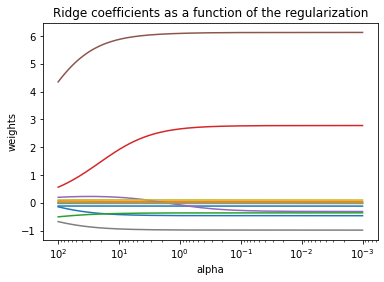

In [5]:
# shrink weights
import matplotlib.pyplot as plt

import numpy as np

n_alphas = 2000
alphas = np.logspace(-3, 2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Display results

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [22]:
# Lasso
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

MSE Train:  24.717
MSE Test:  32.345
R^2 Train:  0.708
R^2 Test:  0.612


In [7]:
# Elastic Net
from sklearn.linear_model import ElasticNet

elanet = ElasticNet(alpha=0.1, l1_ratio=1)
elanet.fit(X_train, y_train)

y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)

regression_metrics(y_train, y_train_pred, y_test, y_test_pred)

MSE Train:  20.926
MSE Test:  28.876
R^2 Train:  0.753
R^2 Test:  0.653


### 4.2.1 RANSAC Details
1. Select a random number of samples (*min_samples*) to be inliers and **fit the model using OLS (*LinearRegression()*)**.
2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance (*residual_threshold*) to the inliers.
3. Refit the model using all inliers.
4. Estimate the error of the fitted model versus the inliers.
5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations  (*max_trials*) were reached; go back to step 1 otherwise.

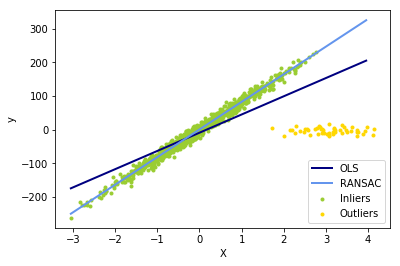

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn import datasets

def data_genetate_1D(n_samples = 1000, n_outliers = 50):
    n_samples = 1000
    n_outliers = 50

    X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                          n_informative=1, noise=10,
                                          coef=True, random_state=0)9987101`
    # Add outlier data
    np.random.seed(0)
    X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
    y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
    
    return X, y, coef

# 1. Data generation
X, y, coef = data_genetate_1D(n_samples = 1000, n_outliers = 50)

# 2.1. Fit using OLS
lr = LinearRegression()
lr.fit(X, y)

# 2.2. Fit linear model with RANSAC algorithm
ransac = RANSACRegressor(min_samples = 5)
# residual_threshold:  is choosen as Median Absolute Deviation
# max_trials: number of iterations
# min_samples：X.shape[1] + 1

ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# 3.1 Show inliners and outliers
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')

# 3.2 Show the predicted lines of OLS and RANSAC
lw = 2
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='OLS')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC')

plt.legend(loc='lower right')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 4. Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

### 4.2.2. Theil-Sen Regression
1. Take all possible pairs of samples, and calculate a list of slopes
2. The median m of the slopes is the final slope

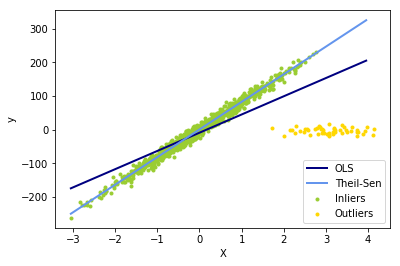

Estimated coefficients (true, linear regression, Theil-Sen):
82.1903908407869 [54.17236387] [80.79099189]


In [25]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn import datasets

# 2.2. Fit linear model with RANSAC algorithm
thsen = TheilSenRegressor()
# residual_threshold:  is choosen as Median Absolute Deviation
# max_trials: number of iterations
# min_samples：X.shape[1] + 1

thsen.fit(X, y)

# 3.1 Show inliners and outliers
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')

# 3.2 Show the predicted lines of OLS and RANSAC
lw = 2
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_thsen = thsen.predict(line_X)
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='OLS')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='Theil-Sen')

plt.legend(loc='lower right')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 4. Compare estimated coefficients
print("Estimated coefficients (true, linear regression, Theil-Sen):")
print(coef, lr.coef_, thsen.coef_)

### 4.2.3. Huber Regression
1. A sample is classified as an inlier if the absolute error of that sample is lesser than a certain threshold (*epsilon*). 
2. It does not ignore the outliers but gives a lesser weight to them.
![huber loss](huber.png)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn import datasets

# 2.2. Fit linear model with huber algorithm
huber = HuberRegressor(alpha=.1, max_iter=100, epsilon=1)
# residual_threshold:  is choosen as Median Absolute Deviation
# max_trials: number of iterations
# min_samples：X.shape[1] + 1

huber.fit(X, y)

# 3.1 Show inliners and outliers
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')

# 3.2 Show the predicted lines of OLS and RANSAC
lw = 2
line_y_huber = huber.predict(line_X)
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='OLS')
plt.plot(line_X, line_y_huber, color='cornflowerblue', linewidth=lw, label='Huber')

plt.legend(loc='lower right')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# 4. Compare estimated coefficients
print("Estimated coefficients (true, linear regression, Huber):")
print(coef, lr.coef_, huber.coef_)

NameError: name 'X' is not defined